In [1]:
from functions import offset_contours
import json
import matplotlib.pyplot as plt

In [2]:
# parâmetros
json_path = "dataset_contours_aggregate_by_patch_filtered.json"
names_to_plot = ["01_5.png", "02_3.png"]  # ou None para todos
offset = 3.0
join_style = "round"
recompute_rates = True

offset_contours: contours updated = 2


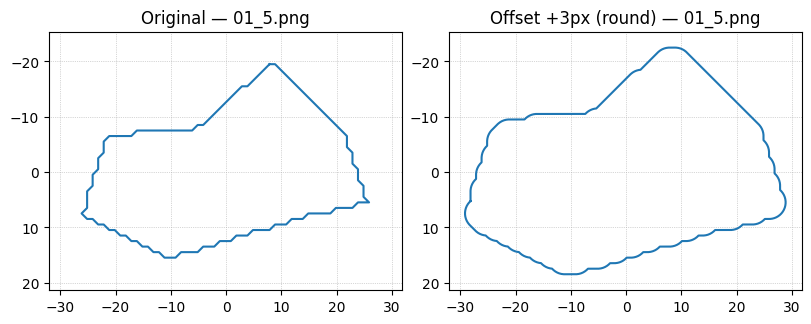

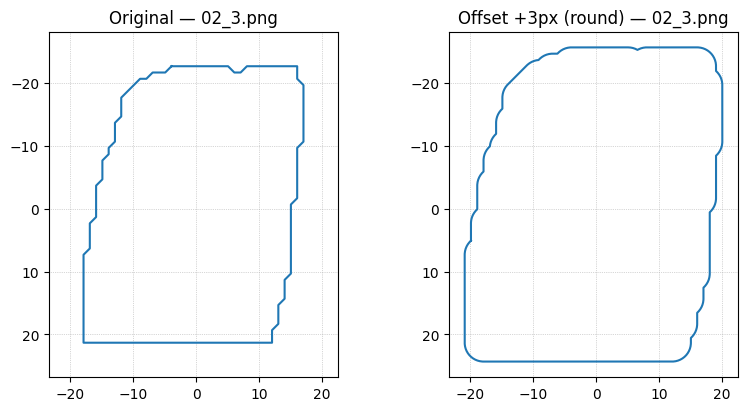

In [3]:
# carregar original
with open(json_path, "r") as f:
    orig = json.load(f)

# aplicar offset

new_data = offset_contours(
    json_path=json_path,
    names_to_offset=names_to_plot,  # ou None
    offset=offset,
    join_style=join_style,
    recompute_rates=recompute_rates,
    verbose=True,
)

# helpers simples
def pick_key(d, cands):
    for k in cands:
        if k in d:
            return k
    return None

#plot lado a lado (assume JSON "flat" por patch, ex.: "01_0.png")
targets = names_to_plot or list(orig.keys())
for name in targets:
    if name not in orig or name not in new_data:
        continue

    r0, r1 = orig[name], new_data[name]
    xk0 = pick_key(r0, ["x coordinate in 0,0","x coordinate","x"])
    yk0 = pick_key(r0, ["y coordinate in 0,0","y coordinate","y"])
    xk1 = pick_key(r1, ["x coordinate in 0,0","x coordinate","x"])
    yk1 = pick_key(r1, ["y coordinate in 0,0","y coordinate","y"])
    if not xk0 or not yk0 or not xk1 or not yk1:
        continue

    xs0, ys0 = r0[xk0], r0[yk0]
    xs1, ys1 = r1[xk1], r1[yk1]
    if not xs0 or not ys0 or not xs1 or not ys1:
        continue

    # mesmos limites pros dois painéis
    allx = xs0 + xs1
    ally = ys0 + ys1
    xmin, xmax = min(allx), max(allx)
    ymin, ymax = min(ally), max(ally)
    pad = 0.05 * max(xmax - xmin, ymax - ymin, 1.0)

    fig, axs = plt.subplots(1, 2, figsize=(8, 4), constrained_layout=True)

    axs[0].plot(xs0, ys0)
    axs[0].set_title(f"Original — {name}")

    axs[1].plot(xs1, ys1)
    axs[1].set_title(f"Offset {offset:+g}px ({join_style}) — {name}")

    for ax in axs:
        ax.set_aspect("equal", adjustable="box")
        ax.invert_yaxis()  # origem (0,0) no topo como em imagem
        ax.set_xlim(xmin - pad, xmax + pad)
        ax.set_ylim(ymax + pad, ymin - pad)
        ax.grid(True, linestyle=":", linewidth=0.5)

    plt.show()
    plt.close(fig)